# **K-Nearest Neighbors (KNN) and Logistic Regression**

# **Exercise 1: Data Exploration and Preprocessing**

**1. Load and Explore the Data**

In [ ]:
 import pandas as pd
 # Load the dataset
 df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
 # Display the first 10 rows
 print(df.head(10))
 # Check for missing values
 print(df.isnull().sum())
 # Descriptive statistics
 print(df.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

**Task: Summarize the Dataset:**

In [ ]:
 # Number of instances and features
 print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
 # Missing values
 print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

**3. Preprocessing**

In [ ]:
 from sklearn.preprocessing import StandardScaler
 # Drop irrelevant columns
 df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
 # Convert diagnosis column
 df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
 # Normalize features
 scaler = StandardScaler()
 features = df.drop(columns=['diagnosis'])
 scaled_features = scaler.fit_transform(features)

**4. Train-Test Split**

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# **Exercise 2: Implementing K-Nearest Neighbors (KNN) Model**

**1. Train the KNN Classifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict the test set
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
[[68  3]
 [ 3 40]]


**2. Experiment with Different n_neighbors:**

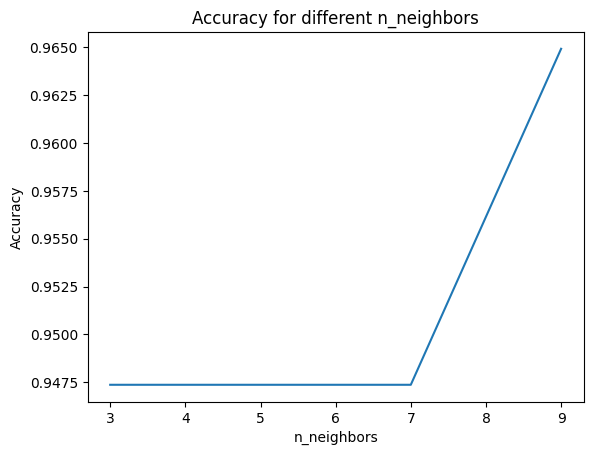

In [ ]:
import matplotlib.pyplot as plt
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.plot(neighbors, accuracies)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

# **Exercise 3: Implementing Logistic Regression**

**1. Train Logistic Regression:**

In [ ]:
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import classification_report

 # Logistic Regression
 logreg = LogisticRegression(max_iter=10000)
 logreg.fit(X_train, y_train)

 # Predict test set
 y_pred_lr = logreg.predict(X_test)

 # Accuracy and classification report
 print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
 print(confusion_matrix(y_test, y_pred_lr))
 print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Comparison of KNN and Logistic Regression:**

In comparing K-Nearest Neighbors (KNN) and logistic regression based on the data, logistic regression shows better overall performance. The accuracy of the logistic regression model is 97.37%, and it has well-balanced precision, recall, and F1-scores across both classes, indicating strong performance in classifying the data. Its linear nature works well for problems with a clear separation between classes, which appears to be the case here.

The KNN model shows a consistent accuracy of around 94.75% for lower values of n_neighbors, but accuracy increases to 96.5% when n_neighbors is set to 9. This suggests that while KNN can approach logistic regression’s accuracy with higher values of neighbors, it doesn’t surpass it in this instance. KNN may be more suitable for datasets with complex, non-linear boundaries, but logistic regression remains the better choice for this dataset due to its higher accuracy and balanced performance across all metrics.

Based on the data, logistic regression performs better in terms of both accuracy and F1-score. The logistic regression model achieves an accuracy of 97.37%, while the K-Nearest Neighbors (KNN) model reaches a maximum accuracy of around 96.5% when n_neighbors=9. Additionally, the F1-scores for logistic regression are high for both classes: 0.98 for class 0 and 0.96 for class 1. These F1-scores indicate a good balance between precision and recall, making logistic regression a strong performer, particularly in handling imbalances between the two classes.

For this classification problem, logistic regression appears to be the more appropriate model. Its higher accuracy, combined with balanced F1-scores across both classes, suggests it handles the data well. Logistic regression is also ideal when there is a linear relationship between the features and the target, which may be the case here given its strong performance. Additionally, logistic regression is simpler and faster to train compared to KNN, which becomes computationally expensive as the dataset size increases and the number of neighbors grows.

# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1. GridSearchCV for KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Best parameters and accuracy
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


**2. Cross-Validation for Logistic Regression:**

In [ ]:
 from sklearn.model_selection import cross_val_score
 # k-fold cross-validation
 cv_scores = cross_val_score(logreg, scaled_features, df['diagnosis'], cv=5)
 print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


#**Exercise 5: Decision Boundary Visualization**

**1. Use PCA for Dimensionality Reduction:**

In [ ]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=2)
 X_pca = pca.fit_transform(scaled_features)
 # KNN and Logistic regression with PCA data
 knn_pca = KNeighborsClassifier(n_neighbors=5)
 knn_pca.fit(X_pca, df['diagnosis'])
 logreg_pca = LogisticRegression(max_iter=10000)
 logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

**Task: Plot the Decision Boundary:**

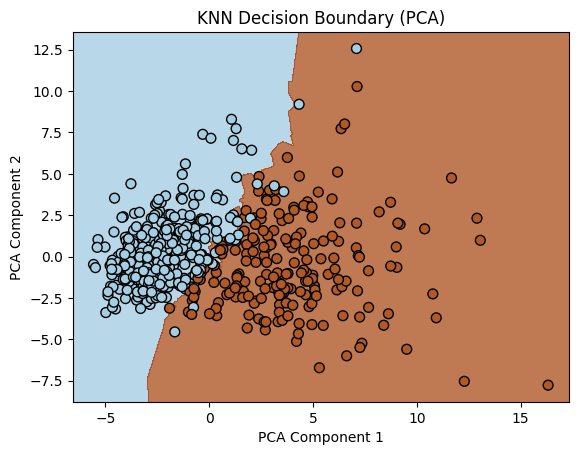

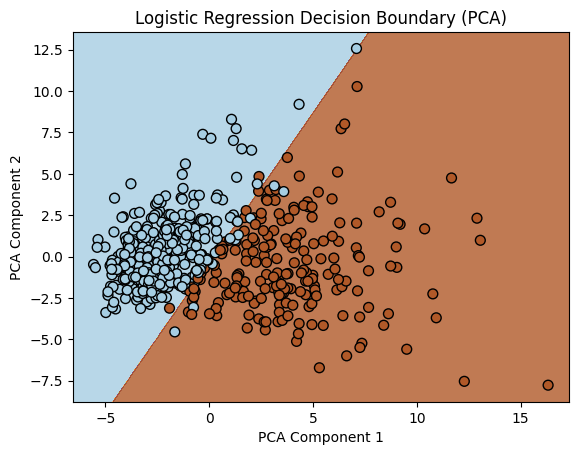

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Perform PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Fit KNN and Logistic Regression models on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

# Define a function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh
    # Create a meshgrid that spans the PCA space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the grid using the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(knn_pca, X_pca, df['diagnosis'], "KNN Decision Boundary (PCA)")
plot_decision_boundary(logreg_pca, X_pca, df['diagnosis'], "Logistic Regression Decision Boundary (PCA)")

The K-Nearest Neighbors (KNN) and logistic regression models show distinct decision boundaries when classifying malignant and benign tumors in 2D PCA space. KNN produces a jagged, irregular boundary due to its non-parametric nature, adapting to local data density and potentially capturing complex patterns but also being sensitive to noise. In contrast, logistic regression yields a smooth, linear boundary, assuming a direct relationship between features and class labels. This simplicity ensures good generalization but might overlook intricate patterns. Overall, KNN offers a detailed separation tailored to local data variations, while logistic regression provides a straightforward, interpretable boundary suited to linearly separable data.